### Euler's Method

The object of Euler's Method is to obtain approximations to the __well-posed__ IVP,

$$
\frac{dy}{dt} = f(t,y), \hspace{0.2cm} t \in [a,b], \hspace{0.2cm} y(a) = \alpha
$$

A continuous approximation to the solution $y(t)$ will not be obtained, instead approximations at various specific values called __mesh points__, in the interval $[a,b]$ will be obtained.

Once the approximate solution is obtained at the __mesh points__, the approximate solution at the other points in the interval can be found by interpolation.

We first ensure that the mesh points are equally distributed throughout the interval $[a,b]$. The condition is ensured by taking a fixed positive interger $N$, and defining,

$$
t_i = a + ih, \hspace{0.2cm} where \hspace{0.2cm} i = 1, 2, 3, ... , N \\
h = \frac{b-a}{N} = t_{i+1} - t_{i}
$$

Here $h$ is the common distance between two consecutive mesh points.

### Derivation Using Taylor's Expansion

Suppose that $y(t)$, the unique solution to the IVP, has first and second derivatives that are continuous on $[a,b]$, so that for each $i=0,1,2,...,N-1$,

$$
\begin{align*}
y(t_{i+1}) = y(t_i) + (t_{i+1} - t_{i})y'(t_i) + \frac{(t_{i+1} - t_i)^{2}}{2} y''(\mathcal{E}_i), \hspace{0.2cm}  \text{where} \hspace{0.2cm} \mathcal{E}_i \in (t_{i}, t_{i+1}) \\
\implies y(t_{i+1}) = y(t_i) + hy'(t_i) + \frac{h^{2}}{2}y''(\mathcal{E}_i), \hspace{0.2cm}  \text{where} \hspace{0.2cm} \mathcal{E}_i \in (t_{i}, t_{i+1}) \\
\text{As} \hspace{0.2cm} y(t) \hspace{0.2cm} \text{satisfies the IVP, we can subsitute} \hspace{0.2cm} y'(t) \hspace{0.2cm} \text{with} \hspace{0.2cm} f(t, y(t)), \\
\implies y(t_{i+1}) = y(t_i) + hf(t_i, y(t_i)) + \frac{h^2}{2} y''(\mathcal{E}_i)
\end{align*}
$$

Euler's Method constructs $w(i) \approx y(t_i)$, for each $i=1,2,...,N$ by deleting the remainder term. Thus the form of Euler's method becomes,

$$
\begin{align*}
w_0 = \alpha,\\ 
w_{i+1} = w_i + hf(t_i, w_i), \hspace{0.2cm} \text{for each} \hspace{0.2cm} i = 0, 1, ..., N-1
\end{align*}
$$

### Example

We will prove that the IVP,

$$
\frac{dy}{dt} = y - t^{2} + 1, \hspace{0.2cm} t \in [0,2], \hspace{0.2cm} y(0)=0.5
$$

is well-posed on $D = \{(t,y)| t \in [0, 2], y \in (-\infty,\infty)\}$.

__Proof:__

Here,

$$
\begin{align*}
\Bigl|\frac{\partial (y - t^{2} +1)}{\partial y}\Bigl| = |1| = 1
\end{align*}
$$

Then by __Theorem 1__ provided in the theory section, $f(t,y) = y - t^{2} + 1$ satisfies a Lipschitz condition in $y$ on $D$ with Lipschitz constant $1$. Furthermore, as $f$ is continous on $D$, by __Definition 3__, this then is a well-posed problem. 

Let us consider the the solution to the perturbed problem, 

$$
\frac{dz}{dt} = z - t^{2} + 1 + \delta, \hspace{0.2cm} t \in [0,2], \hspace{0.2cm} z(0) = 0.5 + \delta_0
$$

where $\delta$ and $\delta_0$ are constants. The solutions to the original IVP and its corresponding perturbed problem are given by, 

$$
(i) \hspace{0.2cm} y(t) = (t+1)^{2} - 0.5 e^{t} \\[0.2cm]
(ii) \hspace{0.2cm} z(t) = (t+1)^{2} + (\delta + \delta_0 -0.5)e^{t} - \delta
$$

Suppose that $\epsilon$ is a positive number. If $|\delta| \lt \epsilon$ and $|\delta_0| \lt \epsilon$, then,

$$
\begin{align*}
|y(t) - z(t)| = |(\delta + \delta_0)e^{t} - \delta| \\
\implies |y(t) - z(t)| \le |\delta + \delta_0|e^2 + |\delta| \\
\implies |y(t) - z(t)| \le (2e^{2} + 1)\epsilon, \hspace{0.2cm} \forall t \in [0,2]
\end{align*}
$$

Hence, this implies that the original problem is well-posed with $k(\epsilon) = 2e^{2} + 1, \hspace{0.2cm} \forall \epsilon \gt 0$ 

## Implementation

In [1]:
import numpy as np
import sympy as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [19]:
class EulerMethod:

    def __init__(self, f, a, b, N, t_0, y_0):
        self.f = f 
        self.a = a
        self.b = b
        self.N = N
        self.t_0 = t_0
        self.y_0 = y_0
        self.h = (b-a)/N
    
    def euler_method(self):
        mesh_points = np.arange(self.a, self.b+self.h, self.h)
        functional_values = np.zeros(self.N+1)
        functional_values[0] = self.y_0

        for i in range(0, self.N):
            functional_values[i+1] = functional_values[i] + self.h*self.f(mesh_points[i], functional_values[i]) 

        return mesh_points, functional_values

    def euler_table(self):
        var_1, var_2 = self.euler_method()
        df = pd.DataFrame({"t":var_1, "y":var_2})
        return df     

In [20]:
def function(t, y):
    return y - t**2 + 1

In [21]:
euler_instance = EulerMethod(function, 0, 2, 10, 0, 0.5)

In [22]:
df = euler_instance.euler_table()

In [26]:
df.head(11)

,t,y
0,0.0,0.500000
1,0.2,0.800000
2,0.4,1.152000
3,0.6,1.550400
4,0.8,1.988480
5,1.0,2.458176
6,1.2,2.949811
7,1.4,3.451773
8,1.6,3.950128
9,1.8,4.428154


In [27]:
def solution(t):
    return (t+1)**2 - 0.5*np.e**t

In [28]:
solution_x = np.linspace(0, 2)
solution_y = np.array([solution(x) for x in solution_x])

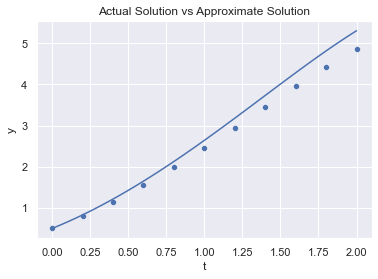

In [29]:
sns.lineplot(x=solution_x, y=solution_y)
sns.scatterplot(x='t', y='y', data=df)
plt.title("Actual Solution vs Approximate Solution")
plt.show()